In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# For editable text. 
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 15}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

# import deconvolution method
#import deconvolution_methods as deconv_method

/Users/sevahn/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns:
        Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

In [3]:
fig_save_path = '../figures/manu_figs/'

In [4]:
os.getcwd()

'/Users/sevahn/Library/Mobile Documents/com~apple~CloudDocs/Documents/peeproject/code'

In [5]:
base_path = '../data/deconvolution_fractions/'
ground_truth = pd.read_csv(f"{base_path}pee_repool_final_fractions__20230517.csv",
                       index_col = 0, header = 0).T

ground_truth.index = [i.split('-NUSVR')[0] for i in ground_truth.index]

In [6]:
# convert the complex labels fronm the cell type coarsegraining
# to the abbreviations, as presented in the methods

labelConversion = {}


labelConversion["gland cell"] = "acinar cell of salivary gland/myoepithelial cell"
labelConversion["respiratory ciliated cell"] = "ciliated cell/lung ciliated cell"
labelConversion["prostate epithelia"] = "club cell of prostate epithelium/hillock cell of prostate epithelium/hillock-club cell of prostate epithelium"
labelConversion["salivary/bronchial secretory cell"] = "duct epithelial cell/serous cell of epithelium of bronchus"
labelConversion["intestinal enterocyte"] = "enterocyte of epithelium of large intestine/enterocyte of epithelium of small intestine/intestinal crypt stem cell of large intestine/large intestine goblet cell/mature enterocyte/paneth cell of epithelium of large intestine/small intestine goblet cell"
labelConversion["erythrocyte/erythroid progenitor"] = "erythrocyte/erythroid progenitor"
labelConversion["fibroblast/mesenchymal stem cell"] = "fibroblast/mesenchymal stem cell"
labelConversion["intestinal secretory cell"] = "intestinal enteroendocrine cell/paneth cell of epithelium of small intestine/transit amplifying cell of small intestine"
labelConversion["ionocyte/luminal epithelial cell of mammary gland"] = "ionocyte/luminal epithelial cell of mammary gland"
labelConversion["secretory cell"] = "mucus secreting cell/secretory cell/tracheal goblet cell"
labelConversion["pancreatic alpha/beta cell"] = "pancreatic alpha cell/pancreatic beta cell"
labelConversion["respiratory secretory cell"] = "respiratory goblet cell/respiratory mucous cell/serous cell of epithelium of trachea"
labelConversion["basal prostate cell"] = "basal cell of prostate epithelia"
labelConversion["intestinal crypt stem cell"] = "immature enterocyte/intestinal crypt stem cell/intestinal crypt stem cell of small intestine/transit amplifying cell of large intestine"
    
revLabs = {}
for l in labelConversion:
    revLabs[labelConversion[l]] = l

In [7]:
base_path = "../data/deconvolution_fractions/bootstrapped_iterations/"
seed_229_stone = pd.read_csv(f'{base_path}pee_repool_BOOTSTRAP_seed229_NOTNORMALS__fractions__20230716.csv',
                            index_col = 0).T
seed_229_stone.index = [i + '-seed229' for i in seed_229_stone.index]

seed_229 = pd.read_csv(f'{base_path}pee_repool_BOOTSTRAP_seed229_NORMALS__fractions__20230716.csv',
                     index_col = 0).T
seed_229.index = [i + '-seed229' for i in seed_229.index]



seed_231_stone = pd.read_csv(f'{base_path}pee_repool_BOOTSTRAP_seed231_NOTNORMALS__fractions__20230704.csv',
                            index_col = 0).T
seed_231_stone.index = [i + '-seed231' for i in seed_231_stone.index]

seed_231 = pd.read_csv(f'{base_path}pee_repool_BOOTSTRAP_seed231_NORMALS__fractions__20230704.csv',
                     index_col = 0).T
seed_231.index = [i + '-seed231' for i in seed_231.index]


In [8]:
seed_231 = pd.concat([seed_231, seed_231_stone], axis = 0)
seed_229 = pd.concat([seed_229, seed_229_stone], axis = 0)

In [9]:
seed_229.columns == seed_231.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
all_deconv_boot_iters = pd.concat([seed_231, seed_229])

In [11]:
cg_ct = []
for i in all_deconv_boot_iters.columns:
    if i in revLabs.keys():
        cg_ct += [revLabs[i]]
    else: cg_ct += [i]

cg_ct = [i.capitalize() for i in cg_ct]

In [12]:
ground_truth_normal = ground_truth.loc[[i for i in ground_truth.index if i[0] == 'N']]

In [13]:
all_deconv_boot_iters.columns == ground_truth.columns
all_deconv_boot_iters.columns == ground_truth_normal.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [14]:
all_deconv_boot_iters.columns = cg_ct
ground_truth_normal.columns = cg_ct
ground_truth.columns = cg_ct

In [15]:
samples = np.unique([i.split("_bootiter")[0] for i in all_deconv_boot_iters.index])

In [16]:
all_deconv_boot_iters['sample_id'] = [i.split("_bootiter")[0] for i in all_deconv_boot_iters.index]

In [17]:
samp_list = ground_truth.index.tolist()

In [18]:
# bootstrap a 95% CI for each cell type for each sample
# focus on the prostate for now

alpha = 0.1


sample_bootiter = {}
ciDF = pd.DataFrame()

for samp in samples:
    all_bootiters = []
    
    if samp not in ground_truth.index:
        print(samp , 'missing ground truth')
        continue
        
    for boot_iter in all_deconv_boot_iters.index:
        if samp in boot_iter: all_bootiters += [boot_iter]
    
    sample_bootiter[samp] = all_bootiters
    
    
    if len(all_bootiters) < 50:
        print(f'not enough {samp}')
        continue
        
    sample_ground_truth = ground_truth.loc[samp]
    
    # just get the bootstrapped fractions
    bootstrap_fracs = all_deconv_boot_iters.loc[all_bootiters].iloc[:, :-1]
    
    ci_vals = []
    
    for ct in bootstrap_fracs:
        vals = bootstrap_fracs[ct]
        lower = np.quantile(vals, (1 - alpha / 2))
        upper = np.quantile(vals, (alpha / 2))
        
        truth = sample_ground_truth[ct]

        ci = ((2 * truth - lower), (2 * truth - upper))
        ci_vals += [ci]
        
    ci_res = pd.DataFrame(index = bootstrap_fracs.columns, data = ci_vals,
                         columns = [samp + "_lower", samp + "_upper"])

    #print("")
    ciDF = pd.concat([ciDF, ci_res], axis = 1)

In [19]:
def lollipop_ci(ct, samp_list, alpha):

    c_level = str( int((1 - alpha) * 100))
    ordered_samps = [i for i in samp_list if 'supt' in i and i[0] != 'N']
    ordered_samps += [i for i in samp_list if 'supt' in i and i[0] == 'N']
    ordered_samps += [i for i in samp_list if 'sediment' in i and i[0] == 'N']
    ordered_samps += [i for i in samp_list if 'sediment' in i and i[0] != 'N']
    
    
    samp_list = ordered_samps
    
    
    lower_vals = ciDF[[i for i in ciDF.loc[ct].index if 'lower' in i]].loc[ct].to_frame()
    upper_vals = ciDF[[i for i in ciDF.loc[ct].index if 'upper' in i]].loc[ct].to_frame()
    
    
    gt_df = ground_truth[ct].to_frame()
    
    
    upper_vals.index = [i.split("_upper")[0] for i in upper_vals.index]
    lower_vals.index = [i.split("_lower")[0] for i in lower_vals.index]

    ct_95ci = pd.concat([lower_vals, upper_vals, gt_df], axis = 'columns')
    ct_95ci = ct_95ci.loc[samp_list]
    
    ct_95ci.columns = [f'{ct}_lower', f'{ct}_upper', f'{ct}_groundtruth']

    ordered_df = ct_95ci.sort_values(by = f'{ct}_lower')
    
    ordered_df = ordered_df.loc[samp_list]
    my_range = range(1, len(ct_95ci.index) + 1)

    plt.figure(figsize = (4, 8))

    ordered_df.index = [i.split("_repool")[0] if 'repool' in i else i for i in ordered_df.index]
    ordered_df.index = [i.replace("_", " ") for i in ordered_df.index]
    
    ordered_df.index = [i.replace("purple", "") for i in ordered_df.index]
    ordered_df.index = [i.replace("supt", "cell-free") for i in ordered_df.index]
    ordered_df.index = [i.replace("sediment", "sediment") for i in ordered_df.index]
    
    plt.hlines(y = my_range, xmin = ordered_df[f'{ct}_lower'],
               xmax=ordered_df[f'{ct}_upper'],
               color = 'grey', alpha = 0.4)

    plt.scatter(ordered_df[f'{ct}_lower'], my_range,
                color = "#0077be", alpha=1, label=f'{ct}_lower')
    
    plt.scatter(ordered_df[f'{ct}_groundtruth'], my_range,
                color = "#ffd000", alpha=1, label=f'{ct}_grountruth')

    plt.scatter(ordered_df[f'{ct}_upper'], my_range,
                color =  "#3F9ED9", alpha=0.4 , label=f'{ct}_upper')

    #plt.legend( bbox_to_anchor = (1.9, 0.5), loc = 'lower right')

    plt.title(f'{ct} {c_level}% CI')
    plt.yticks(my_range, ordered_df.index);
    plt.xlabel('Deconvolved Fraction')
    plt.axvline(color = 'red', x = 0)
    
    #save_figure_pdf(plt, f'{fig_save_path}{ct}_{c_level}ci.pdf')
    
    plt.show()

In [20]:
fig_save_path

'../figures/manu_figs/'

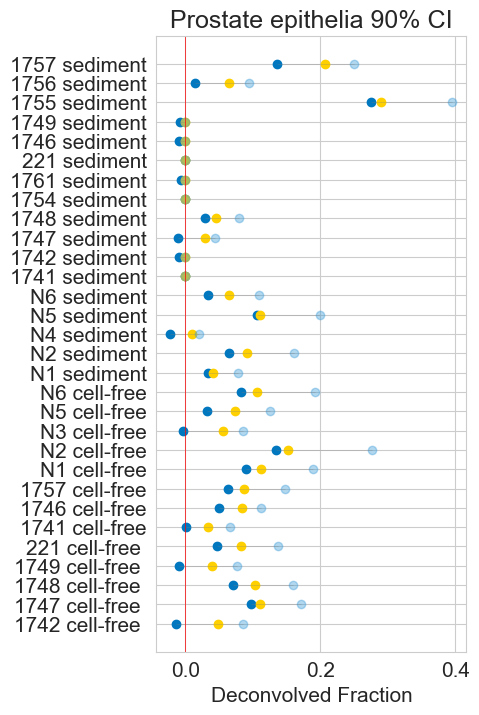

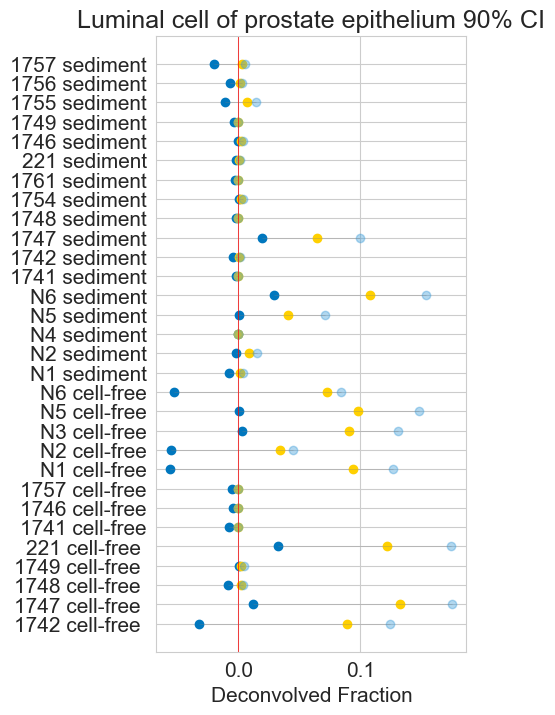

In [21]:
for i in ['Prostate epithelia',
         'Luminal cell of prostate epithelium',]:
    
    lollipop_ci(i, samp_list, alpha)

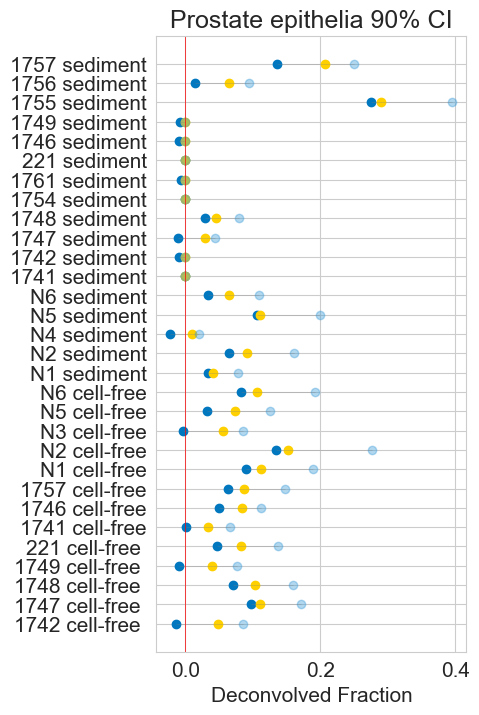

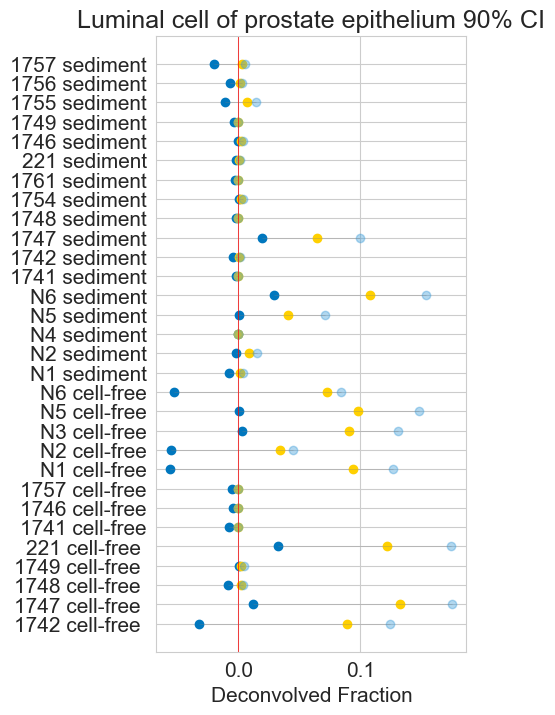

In [22]:
for i in ['Prostate epithelia',
         'Luminal cell of prostate epithelium',]:
    
    lollipop_ci(i, samp_list, alpha)